In [ ]:

!pip install feedparser
!pip install newspaper3k
!pip install konlpy
!pip install bs4
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import feedparser
from newspaper import Article
from konlpy.tag import Okt
from collections import Counter
from operator import eq
import numpy as np
from bs4 import BeautifulSoup

urls = ["http://rss.etnews.com/Section901.xml"]



def get_tags(text, ntags=50):
	num_unique_words = 0
	num_most_freq = 0
	ranking = 0
	spliter = Okt()
	nouns = spliter.nouns(text)
	count = Counter(nouns)
	return_list = []
	for n, c in count.most_common(ntags):
		ranking = ranking + 1		
		temp = {'tag': n, 'count': c, 'ranking': ranking}
		return_list.append(temp)
		num_unique_words = num_unique_words + 1		
		if num_unique_words == 1:
			num_most_freq = c
	return num_unique_words, num_most_freq, return_list

def TF(request, most_freq, tag):
	return 0.1 + 0.9*Howmanywords(request, tag)/most_freq

def Howmanywords(request, tag):
	nWords = 0
	nRanking = 0
	for n in tag:
		noun = n['tag']
		count = n['count']
		rank = n['ranking']
		if eq(noun, request):
			nWords = count
			nRanking = rank
	return nWords, nRanking

def crawl_rss(urls):
	arr_rss = []
	for url in urls:
		print("[Crawl RSS] ",url)
		parse_rss = feedparser.parse(url)
		for p in parse_rss.entries:
			arr_rss.append({'title':p.title, 'link':p.link})
	return arr_rss
	
def crawl_article(url, language='ko'):
	print("[Crawl Article] ",url)
	var_article = Article(url, language=language)
	var_article.download()
	var_article.parse()
	return var_article.title, var_article.text
	
#spliter = Okt()
article_list = crawl_rss(urls)
print(article_list)
for article in article_list:
  _, text = crawl_article(article['link'])
  article['text'] = text
print(article_list)
  
print('[Parsing Text]')
for article in article_list:
  num_unique_words, num_most_freq, tags = get_tags(article['text'], 1000)
  article['tags'] = tags
  article['num_unique_words'] = num_unique_words
  article['num_most_freq'] = num_most_freq





####################추가 내용
print('찾고자 하는 단어를 쓰시오')
query = input()
for article in article_list:
  n, _ = Howmanywords(query, article['tags'])
  if n!=0:
    print('TF:', n, article['title'], article['link'],'\n')



Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
article['num_unique_words']

132

In [ ]:
article_list


[{'link': 'https://www.etnews.com/20210825000071',
  'num_most_freq': 8,
  'num_unique_words': 116,
  'tags': [{'count': 8, 'ranking': 1, 'tag': '구축'},
   {'count': 8, 'ranking': 2, 'tag': '초전도'},
   {'count': 8, 'ranking': 3, 'tag': '관'},
   {'count': 7, 'ranking': 4, 'tag': '가속'},
   {'count': 7, 'ranking': 5, 'tag': '중이온'},
   {'count': 7, 'ranking': 6, 'tag': '속기'},
   {'count': 7, 'ranking': 7, 'tag': '양성자'},
   {'count': 5, 'ranking': 8, 'tag': '개발'},
   {'count': 4, 'ranking': 9, 'tag': '기'},
   {'count': 4, 'ranking': 10, 'tag': '과학'},
   {'count': 4, 'ranking': 11, 'tag': '구단'},
   {'count': 4, 'ranking': 12, 'tag': '타입'},
   {'count': 3, 'ranking': 13, 'tag': '한국'},
   {'count': 3, 'ranking': 14, 'tag': '연구원'},
   {'count': 3, 'ranking': 15, 'tag': '위해'},
   {'count': 3, 'ranking': 16, 'tag': '에너지'},
   {'count': 3, 'ranking': 17, 'tag': '국내'},
   {'count': 3, 'ranking': 18, 'tag': '기술'},
   {'count': 3, 'ranking': 19, 'tag': '성공'},
   {'count': 2, 'ranking': 20, 'tag': '원자력'

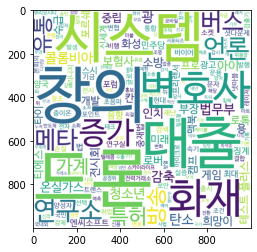

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wc_text = dict()
article_list[0]['tags']
for j in range(len(article_list)):
  for i in range(len(article_list[j]['tags'])):
    wc_text["{}".format(article_list[j]['tags'][i]['tag'])] = article_list[j]['tags'][i]['count']

wc = WordCloud(font_path = 
               '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                 background_color = "white",
                 width = 1000,
                 height = 1000,
                 max_font_size = 300)
word_clouds =wc.generate_from_frequencies(wc_text)
plt.imshow(word_clouds)
plt.show()

In [ ]:
wc_text['한전']

14

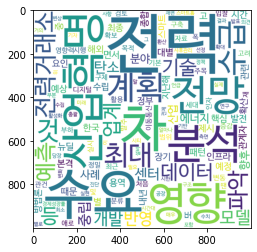